In [90]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import time
import matplotlib as mpl
import plotly.graph_objects as go
from matplotlib.animation import FuncAnimation


Data reading

In [36]:

df = pd.read_csv('cars.csv',encoding='UTF-16',sep=',')
print(df.head(10))  # Print the first 5 rows of the dataframe
df.info()  # Get a concise summary of the dataframe
df.describe()  # Generate descriptive statistics of the dataframe

        Brand     Model  Year     Status  Mileage  \
0       Mazda      CX-5  2023        New      NaN   
1         Kia  Sportage  2023        New      NaN   
2   Chevrolet    Camaro  2024        New      NaN   
3        Ford    Bronco  2023       Used   1551.0   
4       Acura       TLX  2021       Used  30384.0   
5  Volkswagen      Golf  2022  Certified  13895.0   
6         GMC     Yukon  2021       Used  68506.0   
7         BMW      M340  2023        New      NaN   
8     Hyundai    Sonata  2023        New      NaN   
9     Hyundai    Sonata  2023        New      NaN   

                               Dealer    Price  
0                                 NaN  36703.0  
1                         Classic Kia  28990.0  
2          Classic Chevrolet Beaumont  41425.0  
3  Mike Smith Chrysler Dodge Jeep RAM  58900.0  
4                   Mike Smith Nissan  34499.0  
5              Volkswagen of Beaumont  34000.0  
6                     BMW of Beaumont  56954.0  
7                     BM

,Year,Mileage,Price
count,51793.000000,22981.000000,5.064400e+04
mean,2020.971425,53463.782211,5.130342e+04
std,4.215305,44567.464826,3.557212e+04
min,1959.000000,0.000000,1.990000e+03
25%,2020.000000,20609.000000,3.098375e+04
50%,2023.000000,42158.000000,4.559850e+04
75%,2023.000000,73960.000000,6.310050e+04
max,2024.000000,400396.000000,1.299995e+06


In [ ]:
# Data Cleaning
df['Status'] = df['Status'].replace('','0')
df = df.drop_duplicates()  # Remove duplicates
df.loc[df['Status'] == 'New', 'Mileage'] = df.loc[df['Status'] == 'New', 'Mileage'].fillna(0)
df = df.dropna()  # Remove rows with missing values
df.isna().sum()
print("The categories in the variable 'Status': ",end=" ")
print(df['Status'].unique())

In [4]:
# Storage
df.to_csv('cleaned_data.csv')  # Save the cleaned data to a csv file
df.to_json('cleaned_data.json')  # Save the cleaned data to a json file


In [5]:
# Checking the categories of the categorical features:


print("The categories in the variable 'Brand': ",end=" ")
print(df['Brand'].unique())


print("The categories in the variable 'Model': ",end=" ")
print(df['Model'].unique())

print("The categories in the variable 'Dealer': ",end=" ")
print(df['Dealer'].unique())

print("The categories in the variable 'Status': ",end=" ")
print(df['Status'].unique())

min_price = df['Price'].min()
max_price = df['Price'].max()
print("The minimum price of the car = {}".format(min_price))
print("The maximum price of the car = {}".format(max_price))

The categories in the variable 'Brand':  ['Kia' 'Chevrolet' 'Ford' 'Acura' 'Volkswagen' 'GMC' 'BMW' 'Hyundai'
 'Jeep' 'Dodge' 'Infiniti' 'Honda' 'Lexus' 'Toyota' 'Cadillac' 'Buick'
 'Mazda' 'Lincoln' 'Mercury' 'MINI' 'RAM' 'Land Rover' 'Audi' 'Nissan'
 'Mercedes' 'Porsche' 'Subaru' 'Jaguar' 'Maserati' 'Alfa Romeo' 'Tesla'
 'Bentley' 'Genesis' 'Volvo' 'Chrysler' 'Mitsubishi' 'FIAT' 'Rivian'
 'Aston Martin' 'Lamborghini' 'Hummer' 'Saturn' 'Rolls-Royce' 'Ferrari'
 'Polestar' 'Lucid' 'Scion' 'Pontiac' 'Karma' 'Smart' 'McLaren' 'Lotus'
 'Saab' 'Maybach' 'Suzuki' 'International Scout' 'Geo' 'Oldsmobile'
 'Isuzu']
The categories in the variable 'Model':  ['Sportage' 'Camaro' 'Bronco' 'TLX' 'Golf' 'Yukon' 'M340' 'Sonata'
 'Grand Cherokee' 'Wagoneer' 'Durango' 'Mustang' 'F-350' 'QX30' 'Passport'
 'ES' 'Sierra' 'Tundra' 'CT5' 'Envista' 'CX-5' 'Civic' 'Accord' 'Atlas'
 '4Runner' 'Sequoia' 'Continental' 'Marquis' 'IS' 'LX' 'RZ 450e'
 'Escalade' 'LS' 'Nautilus' 'Integra' 'MDX' '435 i' 'ILX' 'Palisa

In [38]:
df['Company_Model'] = df['Brand'] + " " + df['Model']
top3_models = df.groupby('Brand')['Company_Model'].apply(lambda x: x.value_counts().nlargest(3))
top3_models

Brand                         
Acura       Acura MDX             323
            Acura TLX             217
            Acura RDX             123
Alfa Romeo  Alfa Romeo Giulia      90
            Alfa Romeo Stelvio     67
                                 ... 
Volkswagen  Volkswagen Golf       147
            Volkswagen Jetta      139
Volvo       Volvo XC90            246
            Volvo XC60            152
            Volvo XC40             97
Name: Company_Model, Length: 160, dtype: int64

In [39]:

brand_popularity = df.groupby(['Brand','Model', 'Year']).size()
brand_popularity


Brand  Model  Year
Acura  ILX    2015     1
              2017     1
              2018     3
              2019     8
              2020     3
                      ..
Volvo  XC90   2020    56
              2021    26
              2022    13
              2023    85
              2024    46
Length: 4232, dtype: int64

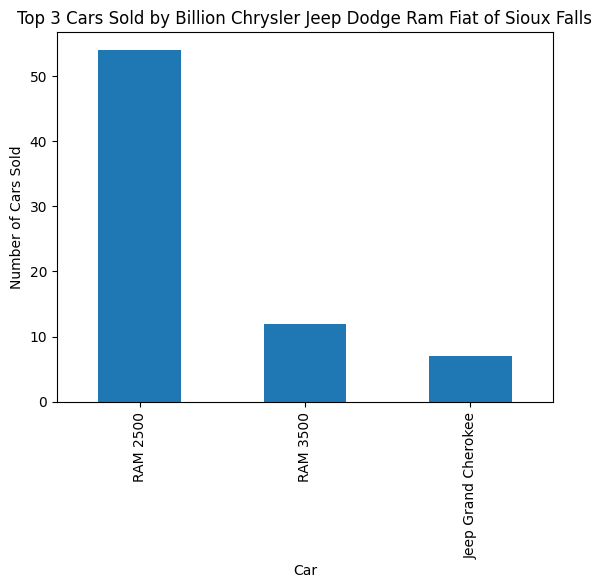

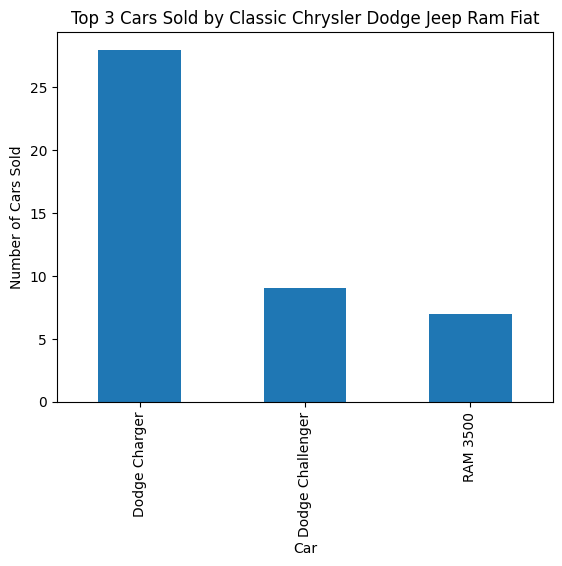

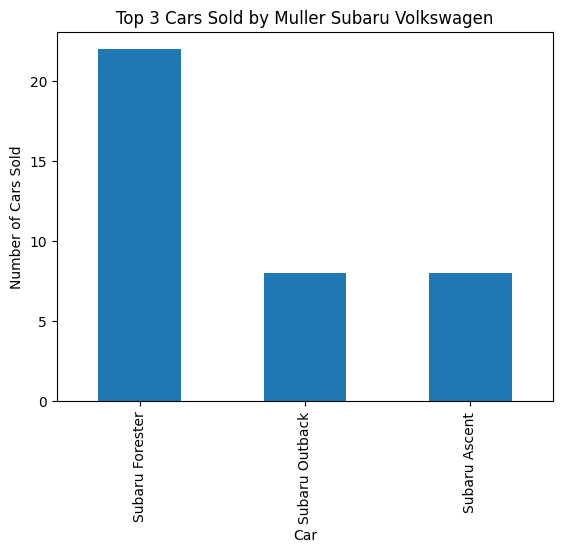

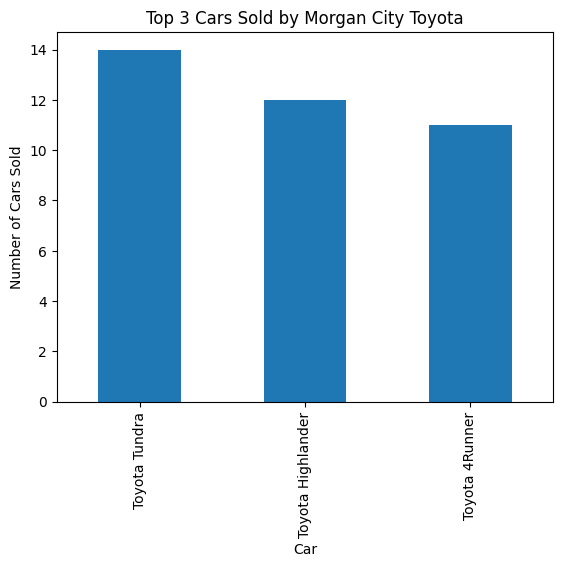

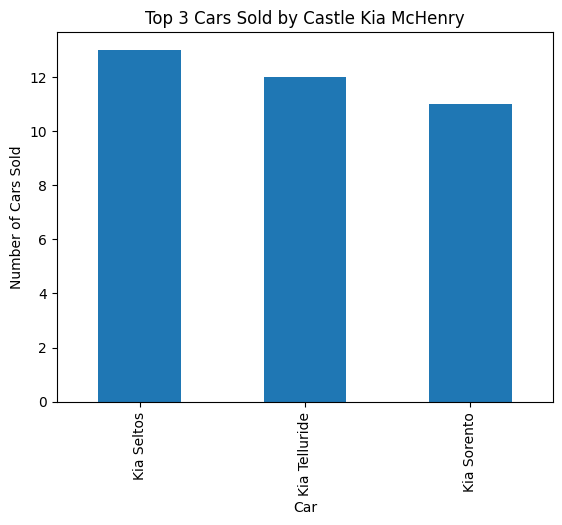

In [74]:

# Filter the dataset to include only new cars
new_cars_data = df[df['Status'] == 'New']
top5_dealers = new_cars_data['Dealer'].value_counts().nlargest(5).index

# Filter DataFrame to only include top 5 dealers
df_top5 = df[df['Dealer'].isin(top5_dealers)]

# Get top 3 cars sold by each dealer
# top3_cars = df_top5.groupby('Dealer')['Company_Model'].apply(lambda x: x.value_counts(ascending=False).nlargest(3))

# Plot
for dealer in top5_dealers:
    
    df_dealer = new_cars_data[new_cars_data['Dealer'] == dealer]
    top3_cars = df_dealer['Company_Model'].value_counts().nlargest(3)
    top3_cars.plot(kind='bar', title=f'Top 3 Cars Sold by {dealer}')
    plt.xlabel('Car')
    plt.ylabel('Number of Cars Sold')
    plt.show()

In [11]:
avg_price_by_year = df.groupby(['Brand', 'Model', 'Year','Status'])['Price'].mean()
avg_price_by_year

Brand  Model  Year  Status   
Acura  ILX    2015  Used         13650.000000
              2017  Used         16990.000000
              2018  Used         18956.000000
              2019  Certified    23621.500000
                    Used         22659.500000
                                     ...     
Volvo  XC90   2022  Used         47883.333333
              2023  Certified    63695.000000
                    New          65882.521127
                    Used         58576.600000
              2024  New          72834.782609
Name: Price, Length: 5432, dtype: float64

In [86]:
price_distribution = df.groupby('Status')['Price'].describe()
price_distribution

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Certified,3069.0,50858.246986,37537.417609,8888.0,32000.0,41380.0,56980.0,679988.0
New,26601.0,61641.356791,33846.694894,5935.0,42820.0,54998.0,72230.0,563750.0
Used,19866.0,37434.631783,33314.677639,1990.0,20000.0,31000.0,45000.0,1299995.0


In [75]:
# 3. Mileage Analysis
# Average mileage by brand and model
avg_mileage = df.groupby(['Brand', 'Model'])['Mileage'].mean()
avg_mileage


Brand  Model  
Acura  ILX         37429.173913
       Integra      7595.483871
       LS         131636.000000
       MDX         49340.478947
       NSX         14393.600000
                      ...      
Volvo  V90         28018.571429
       XC40        27751.423077
       XC60        41685.802817
       XC70       107442.000000
       XC90        43424.943089
Name: Mileage, Length: 668, dtype: float64

In [24]:
avg_price_by_dealer = df.groupby('Dealer')['Price'].mean()
avg_price_by_dealer.head()

Dealer
#1 Brookville Chevrolet Buick         48079.000000
#1 Cochran Cadillac Monroeville       82407.500000
#1 Cochran Chevrolet                  36727.000000
#1 Cochran Chrysler Dodge Jeep Ram    56330.750000
#1 Cochran Ford                       70456.666667
Name: Price, dtype: float64

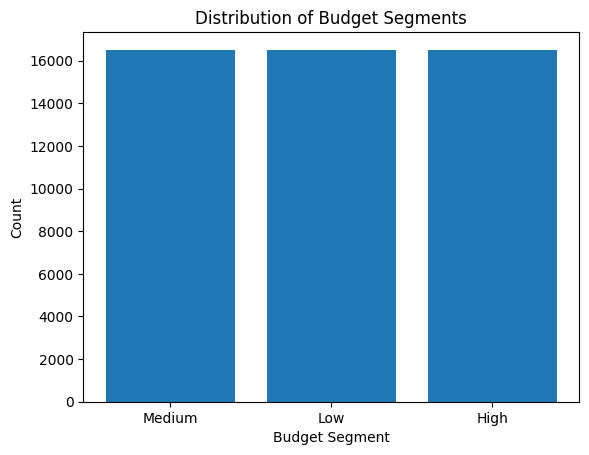

Price
Medium    16517
Low       16515
High      16504
Name: count, dtype: int64

In [103]:
# Presentation
budget_segments = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])
segment_counts = budget_segments.value_counts()

# Plot the distribution of budget segments
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Budget Segment')
plt.ylabel('Count')
plt.title('Distribution of Budget Segments')
plt.show()
segment_counts

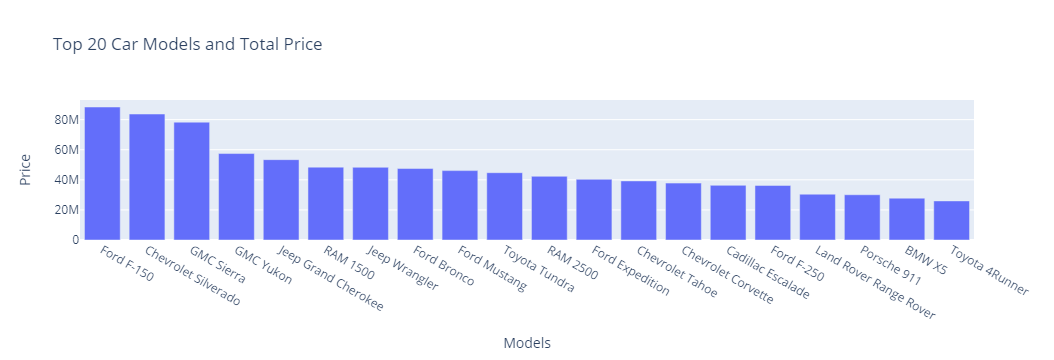

In [78]:

filter=df.groupby(by=['Company_Model']).agg({'Price':'sum'})
car_style=filter.sort_values(by='Price',ascending=False).head(20)
fig = go.Figure(data=[
    go.Bar(x=car_style.index,y=car_style.Price)
    ])

fig.update_layout(
    title='Top 20 Car Models and Total Price',
    xaxis_title='Models',
    yaxis_title='Price'
)

fig.show()

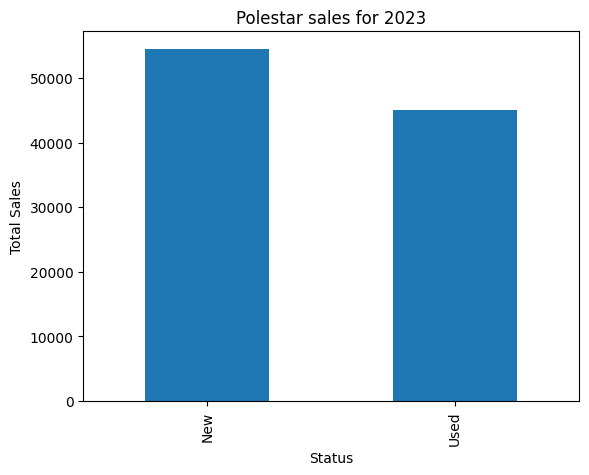

In [96]:
df_2023 = df[df['Year'] == 2023]

# Get unique brands
brands = df_2023['Brand'].unique()

# For each brand, group by 'Status' and calculate sum of 'Price'
for brand in brands:
    df_brand = df_2023[df_2023['Brand'] == brand]
    sales_by_status = df_brand.groupby('Status')['Price'].sum()
    
    # Create bar plot
    sales_by_status.plot(kind='bar', title=f'{brand} sales for 2023')
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.xlabel('Status')
    plt.ylabel('Total Sales')
    plt.show()
    
    time.sleep(1)  # Wait for 1 second
    clear_output(wait=True)  # Clear output